In [ ]:
!pip install tensorflow

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
X_train = normalize(X_train,axis=1)
X_test = normalize(X_test,axis=1)


In [9]:
print(f"X train shape: {X_train.shape}")
print(f"X training example: {X_train[5]}")

print(f"X test shape: {X_test.shape}")
print(f"X test example: {X_test[5]}")

print(f"y train shape: {y_train.shape}")
print(f"y training example: {y_train[5]}")

print(f"y test shape: {y_test.shape}")
print(f"y test example: {y_test[5]}")

X train shape: (60000, 28, 28)
X training example: [[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.02 0.04 0.16 0.14 0.01 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05
  0.23 0.31 0.41 0.

In [10]:
def show_random_sample(X, y):
    m, n, n = X.shape  # training examples no, shape of x (28*28)

    fig, axes = plt.subplots(4,4, figsize=(5,5))
    fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

    for i,ax in enumerate(axes.flat):
        # Select random indices
        random_index = np.random.randint(m)

        # Display the image of this random index
        ax.imshow(X[random_index], cmap='gray')

        # Display the label of the image above it
        ax.set_title(y[random_index])
        
        
        ax.set_axis_off() # remove ticks, ax line, & label
        fig.suptitle("Label, image", fontsize=14)

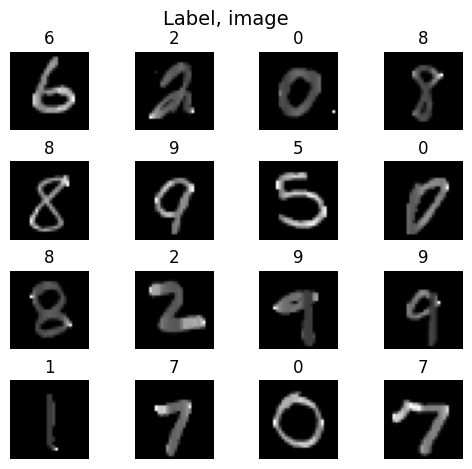

In [11]:
show_random_sample(X_train, y_train)

In [35]:
tf.random.set_seed(1234) # for consistent results

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu', name='L1'))
model.add(Dense(128, activation='relu', name='L2'))
model.add(Dropout(0.2, name='L3'))
model.add(Dense(10, activation='softmax', name='L4'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 128)               100480    
                                                                 
 L2 (Dense)                  (None, 128)               16512     
                                                                 
 L3 (Dropout)                (None, 128)               0         
                                                                 
 L4 (Dense)                  (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [37]:
[input_layer, layer1, layer2, layer3, layer4] = model.layers
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W4,b4 = layer4.get_weights()
print(f"{layer1.name} : W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"{layer2.name} : W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"{layer4.name} : W3 shape = {W4.shape}, b3 shape = {b4.shape}")

L1 : W1 shape = (784, 128), b1 shape = (128,)
L2 : W2 shape = (128, 128), b2 shape = (128,)
L4 : W3 shape = (128, 10), b3 shape = (10,)


In [38]:
model.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

In [39]:
history = model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2968 - accuracy: 0.9118
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1195 - accuracy: 0.9637
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0840 - accuracy: 0.9737


In [40]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0971 - accuracy: 0.9706


In [18]:
# model.save('handwritten.model')

In [19]:
# model = tf.keras.models.load_model('handwritten.model')

In [42]:
def display_digit(x, y, yhat):
    m, n, n = x.shape

    fig, axis = plt.subplots(1,1,figsize=(3, 3))
    # Display the image
    axis.imshow(x[0], cmap='gray')

    # Display the label above the image
    axis.set_title(f"{y},{yhat}",fontsize=10)
    
    axis.set_axis_off()
    fig.suptitle("Label, yhat", fontsize=8)
    plt.show()

1/1 [==============================] - 0s 55ms/step
 predicting a zero: 
[[9.61e-01 1.19e-04 3.59e-03 2.86e-03 4.27e-05 2.34e-02 2.10e-03 2.06e-05
  4.49e-03 2.13e-03]]

 predicting a zero. Probability vector: 
[[0.22 0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.09]]

 Largest Prediction index : 0

Total of predictions: 1.000


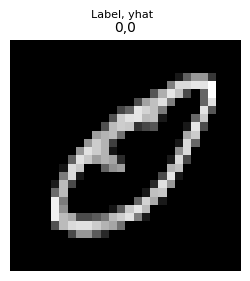

In [43]:
img_of_zero = np.array([X_train[1015]])
label_of_zero = y_train[1015]

y_predicted = model.predict(img_of_zero)
print(f" predicting a zero: \n{y_predicted}\n")

y_predicted_p = tf.nn.softmax(y_predicted)
print(f" predicting a zero. Probability vector: \n{y_predicted_p}\n")

yhat = np.argmax(y_predicted_p)
print(f" Largest Prediction index : {np.argmax(yhat)}\n")

print(f"Total of predictions: {np.sum(y_predicted_p):0.3f}")

display_digit(img_of_zero, label_of_zero, yhat)


1/1 [==============================] - 0s 18ms/step
This digit is a 0.


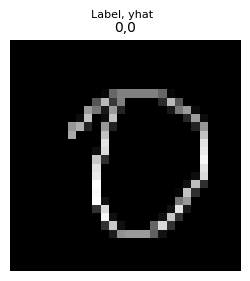

1/1 [==============================] - 0s 22ms/step
This digit is a 1.


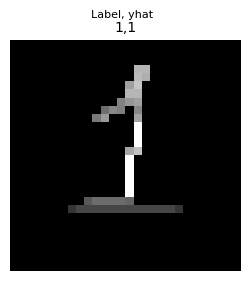

1/1 [==============================] - 0s 24ms/step
This digit is a 2.


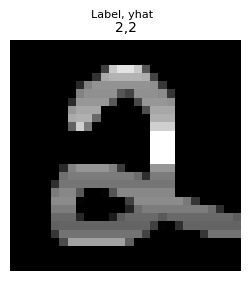

1/1 [==============================] - 0s 22ms/step
This digit is a 3.


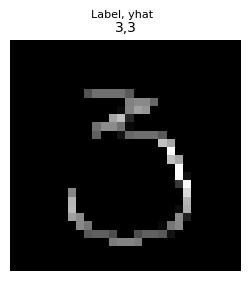

1/1 [==============================] - 0s 25ms/step
This digit is a 3.


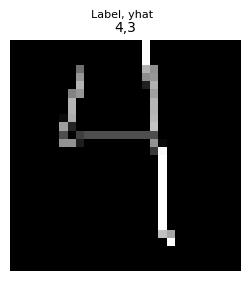

1/1 [==============================] - 0s 20ms/step
This digit is a 5.


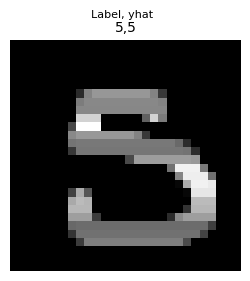

1/1 [==============================] - 0s 19ms/step
This digit is a 6.


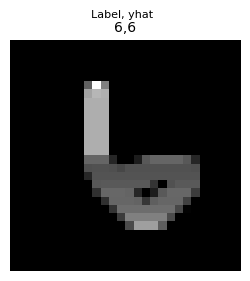

1/1 [==============================] - 0s 22ms/step
This digit is a 7.


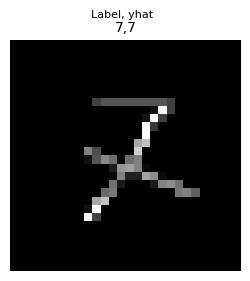

1/1 [==============================] - 0s 20ms/step
This digit is a 8.


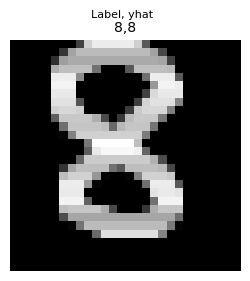

1/1 [==============================] - 0s 21ms/step
This digit is a 9.


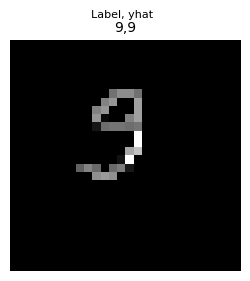

1/1 [==============================] - 0s 17ms/step
This digit is a 0.


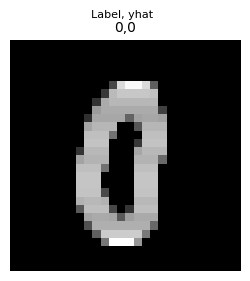

1/1 [==============================] - 0s 18ms/step
This digit is a 1.


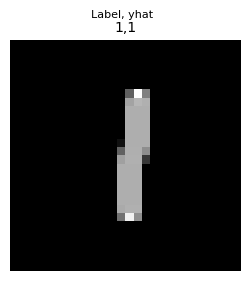

1/1 [==============================] - 0s 22ms/step
This digit is a 2.


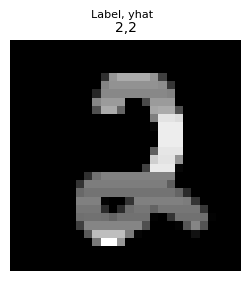

1/1 [==============================] - 0s 19ms/step
This digit is a 3.


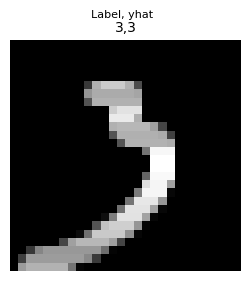

In [57]:
import os
import cv2

img_no = 0
correctly_classified = 0
while os.path.isfile(f"/test-data/{img_no}.png"):
    try:
        img = cv2.imread(f"/test-data/{img_no}.png", cv2.IMREAD_GRAYSCALE)

        img = cv2.resize(img, (28, 28))
        img = np.invert(np.array([img]))
        img = normalize(img)

        prediction = model.predict(img)
        print(f"This digit is a {np.argmax(prediction)}.")

        display_digit(img, img_no%10, np.argmax(prediction))
        correctly_classified += (img_no%10 == np.argmax(prediction))
    except: 
        print("Error!")
    finally:
        img_no += 1
        

In [58]:
print(f"Percentage of correctly calssified images : {correctly_classified/img_no*100}")
print(f"number of correctly classified images from {img_no} : {correctly_classified}")

Percentage of correctly calssified images : 92.85714285714286
number of correctly classified images from 14 : 13
